In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### 10.2.2 데이터셋의 중요 특징 시각화

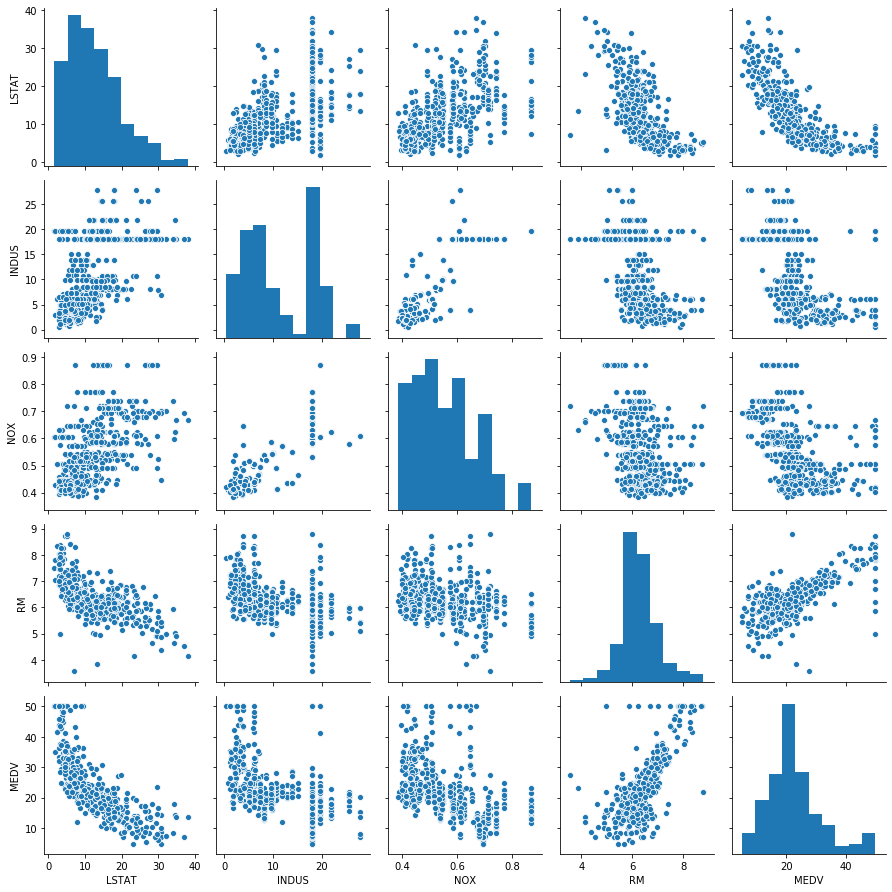

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

### 10.2.3 상관관계 행렬을 사용한 분석

In [7]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
print(cm)

[[ 1.          0.60379972  0.59087892 -0.61380827 -0.73766273]
 [ 0.60379972  1.          0.76365145 -0.39167585 -0.48372516]
 [ 0.59087892  0.76365145  1.         -0.30218819 -0.42732077]
 [-0.61380827 -0.39167585 -0.30218819  1.          0.69535995]
 [-0.73766273 -0.48372516 -0.42732077  0.69535995  1.        ]]


(4.5, 0.5)


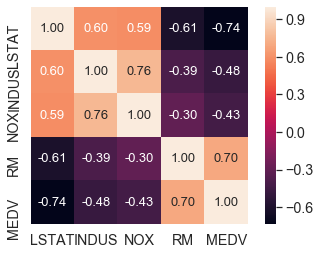

In [41]:
sns.set(font_scale=1.3)

hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':13},
                yticklabels=cols,
                xticklabels=cols
                )
#plt.tight_layout()
print(hm.get_ylim())
hm.set_ylim(5.0,0.0) # matplot 버전때문에 수동조절
plt.show()

### 10.3.2 사이킷런으로 회귀 모델의 가중치 추정

In [50]:
# 경사하강 클래스

class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [54]:
X = df[['RM']].values
y = df['MEDV'].values
print(X)
print(y)

[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]
 [6.377]
 [6.009]
 [5.889]
 [5.949]
 [6.096]
 [5.834]
 [5.935]
 [5.99 ]
 [5.456]
 [5.727]
 [5.57 ]
 [5.965]
 [6.142]
 [5.813]
 [5.924]
 [5.599]
 [5.813]
 [6.047]
 [6.495]
 [6.674]
 [5.713]
 [6.072]
 [5.95 ]
 [5.701]
 [6.096]
 [5.933]
 [5.841]
 [5.85 ]
 [5.966]
 [6.595]
 [7.024]
 [6.77 ]
 [6.169]
 [6.211]
 [6.069]
 [5.682]
 [5.786]
 [6.03 ]
 [5.399]
 [5.602]
 [5.963]
 [6.115]
 [6.511]
 [5.998]
 [5.888]
 [7.249]
 [6.383]
 [6.816]
 [6.145]
 [5.927]
 [5.741]
 [5.966]
 [6.456]
 [6.762]
 [7.104]
 [6.29 ]
 [5.787]
 [5.878]
 [5.594]
 [5.885]
 [6.417]
 [5.961]
 [6.065]
 [6.245]
 [6.273]
 [6.286]
 [6.279]
 [6.14 ]
 [6.232]
 [5.874]
 [6.727]
 [6.619]
 [6.302]
 [6.167]
 [6.389]
 [6.63 ]
 [6.015]
 [6.121]
 [7.007]
 [7.079]
 [6.417]
 [6.405]
 [6.442]
 [6.211]
 [6.249]
 [6.625]
 [6.163]
 [8.069]
 [7.82 ]
 [7.416]
 [6.727]
 [6.781]
 [6.405]
 [6.137]
 [6.167]
 [5.851]
 [5.836]
 [6.127]
 [6.474]
 [6.229]
 [6.195]
 

In [55]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [56]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

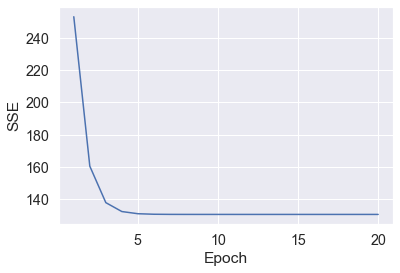

In [57]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
#plt.tight_layout()
#plt.savefig('images/10_05.png', dpi=300)
plt.show()

In [58]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

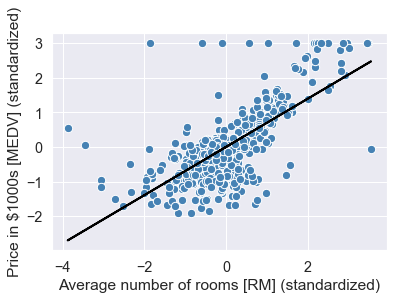

Slope: 0.695
Intercept: -0.000
Price in $1000s: 10.840


In [59]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

#plt.savefig('images/10_06.png', dpi=300)
plt.show()
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print("Price in $1000s: %.3f" % sc_y.inverse_transform(price_std))

In [60]:
from sklearn.linear_model import LinearRegression


In [61]:
slr = LinearRegression()
slr.fit(X,y)
print("기울기 : %.3f " % slr.coef_)
print("절편 : %.3f " % slr.intercept_)

기울기 : 9.102 
절편 : -34.671 


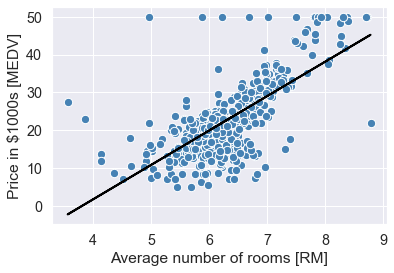

In [62]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

#plt.savefig('images/10_07.png', dpi=300)
plt.show()

In [63]:
# adding a column vector of "ones"
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print('Slope: %.3f' % w[1])
print('Intercept: %.3f' % w[0])

Slope: 9.102
Intercept: -34.671
